In [1]:
# imports necessary plotting libraries, color definitions, etc. 
from src.utilities.plotting_import import *

# Load data

## One-qubit POVM

In [2]:
# Experimental fidelities - limited by noise and approximate compiling
fidelity_naimark_1q = pickle.load(open(path+'data/final_results/state_tomography_results/state_1q_fidelity_kolkata_naimark.p','rb'))
fidelity_binary_1q = pickle.load(open(path+'data/final_results/state_tomography_results/state_1q_fidelity_kolkata_binary.p','rb'))

In [3]:
# Error-mitigated experimental fidelities - limited by noise and approximate compiling
fidelity_naimark_rem_1q = pickle.load(open(path+'data/final_results/state_tomography_results/state_1q_fidelity_kolkata_naimark_rem.p','rb'))
fidelity_binary_crem_1q = pickle.load(open(path+'data/final_results/state_tomography_results/state_1q_fidelity_kolkata_binary_crem.p','rb'))

## Two-qubit POVM

In [4]:
# Experimental fidelities - limited by noise and approximate compiling
fidelities_naimark_2q, std_naimark = pickle.load(open(path+'data/final_results/state_tomography_results/state_2q_fidelities_kolkata_naimark.p','rb'))
fidelities_binary_2q, std_binary = pickle.load(open(path+'data/final_results/state_tomography_results/state_2q_fidelities_kolkata_binary.p','rb'))
fidelities_hybrid_2q, std_hybrid = pickle.load(open(path+'data/final_results/state_tomography_results/state_2q_fidelities_kolkata_hybrid.p','rb'))

In [5]:
# Peak (non error-mitigated) fidelities for each algorithm
peak_fidelity_hybrid_2q = max(fidelities_hybrid_2q.values())*100
peak_fidelity_naimark_2q = max(fidelities_naimark_2q.values())*100
peak_fidelity_binary_2q = max(fidelities_binary_2q.values())*100

In [6]:
# Error-mitigated experimental fidelities - limited by noise and approximate compiling
fidelities_naimark_rem_2q, std_naimark_rem_2q = pickle.load(open(path+'data/final_results/state_tomography_results/state_2q_fidelities_kolkata_naimark_rem.p','rb'))
fidelities_binary_crem_2q, std_binary_crem_2q = pickle.load(open(path+'data/final_results/state_tomography_results/state_2q_fidelities_kolkata_binary_crem.p','rb'))
fidelities_hybrid_crem_2q, std_hybrid_crem_2q = pickle.load(open(path+'data/final_results/state_tomography_results/state_2q_fidelities_kolkata_hybrid_crem.p','rb'))

In [7]:
# Peak (error-mitigated) fidelities for each algorithm
peak_fidelity_hybrid_crem_2q = max(fidelities_hybrid_crem_2q.values())*100
peak_fidelity_naimark_rem_2q = max(fidelities_naimark_rem_2q.values())*100
peak_fidelity_binary_crem_2q = max(fidelities_binary_crem_2q.values())*100

# Plot

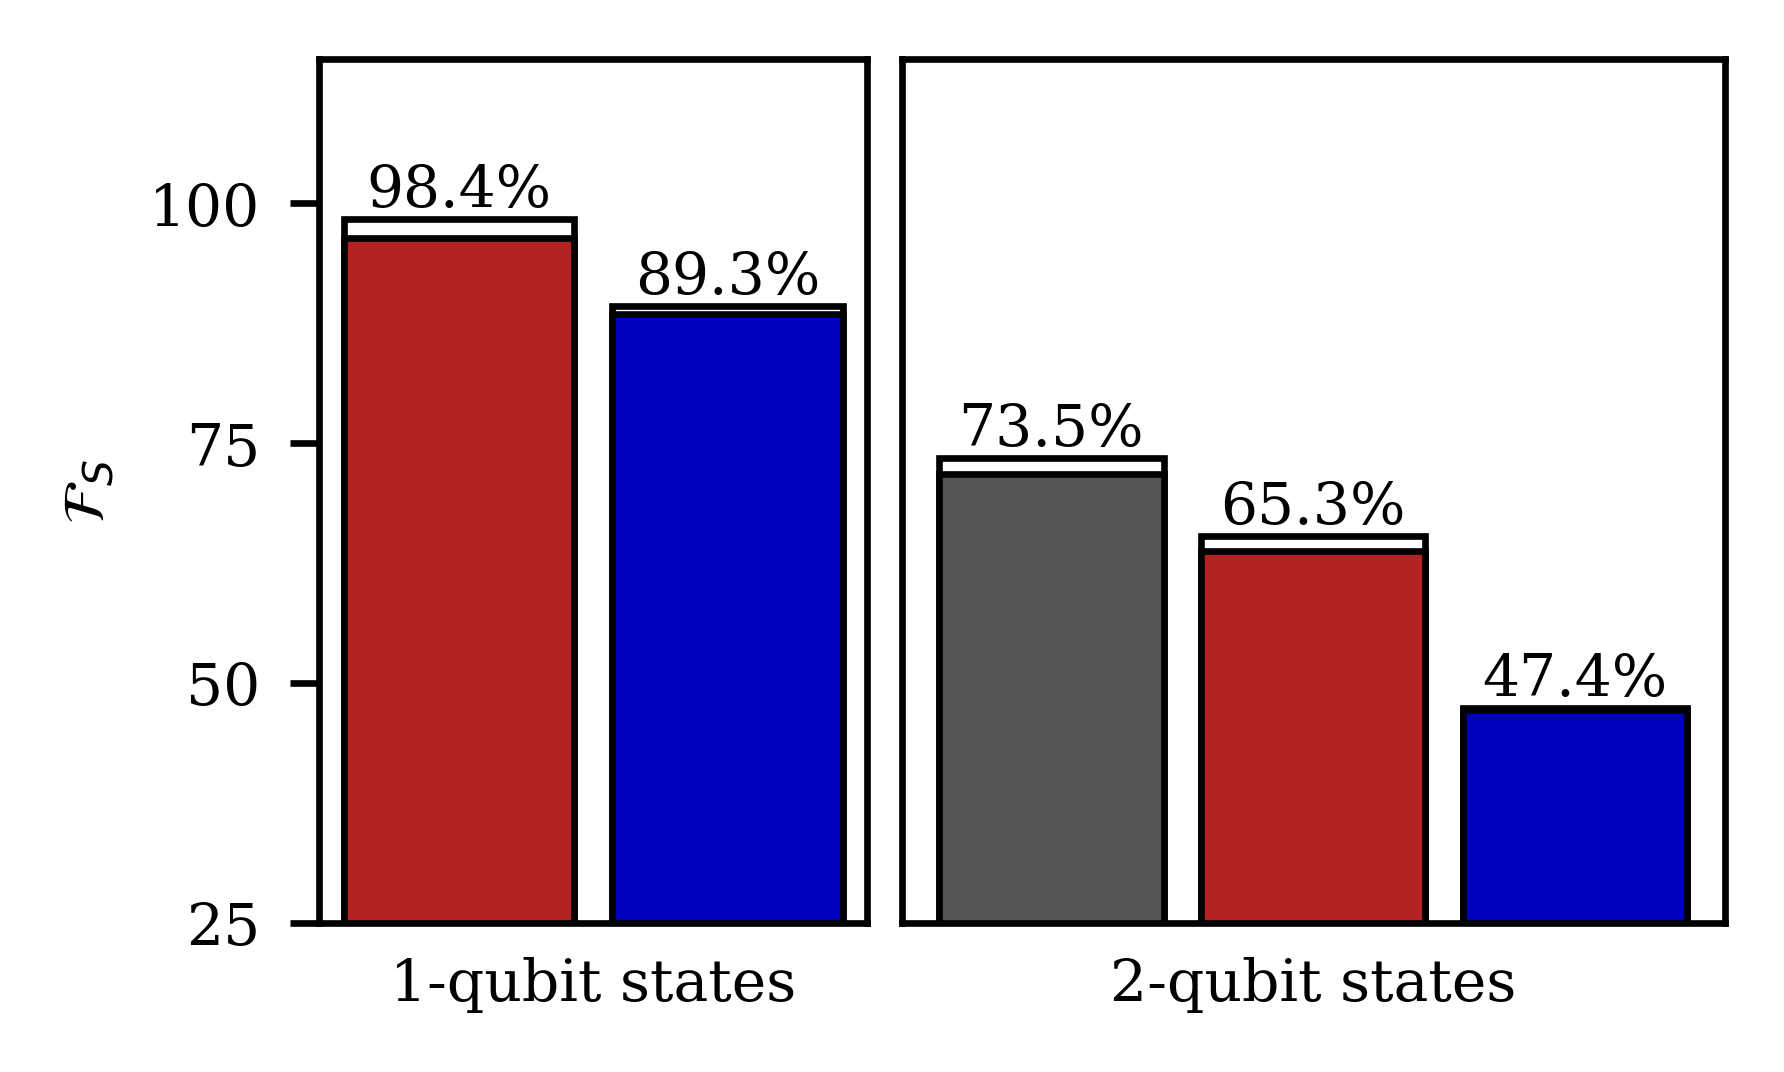

In [8]:
# Create a subplot with 1 row and 2 columns
fig, ax = plt.subplots(ncols=2, nrows=1, 
                        figsize=(figure_size_x/2, figure_size_y/2),
                        gridspec_kw={'width_ratios': [2,3]})
barWidth = 0.3
linewidth = 0.8


# 1-Qubit POVM subplot
# Mitigated results
bars0 = ax[0].bar([1,1.35], 
                  [fidelity_naimark_rem_1q,
                   fidelity_binary_crem_1q], 
                  color=white, 
                  width=barWidth, 
                  edgecolor=black,
                  linewidth=linewidth)
# Unmitigated results
ax[0].bar(1, 
          fidelity_naimark_1q, 
          color=red, 
          width=barWidth, 
          edgecolor=black,
          linewidth=linewidth)
ax[0].bar(1.35, 
          fidelity_binary_1q, 
          color=blue, 
          width=barWidth, 
          edgecolor=black,
          linewidth=linewidth)

# 2-Qubit POVM subplot
# Mitigated results
bars1 = ax[1].bar([1,1.35,1.7], 
                  [peak_fidelity_hybrid_crem_2q, 
                   peak_fidelity_naimark_rem_2q, 
                   peak_fidelity_binary_crem_2q], 
                  color=white, 
                  width=barWidth, 
                  edgecolor=black,
                  linewidth=linewidth)
# Unmitigated results
ax[1].bar(1, 
          peak_fidelity_hybrid_2q, 
          color=dark_grey, 
          width=barWidth, 
          edgecolor=black, 
          label='Hybrid',
          linewidth=linewidth)
ax[1].bar(1.35, 
          peak_fidelity_naimark_2q, 
          color=red, 
          width=barWidth, 
          edgecolor=black, 
          label='Naimark',
          linewidth=linewidth)
ax[1].bar(1.7, 
          peak_fidelity_binary_2q, 
          color=blue, width=barWidth, 
          edgecolor=black, 
          label='Binary',
          linewidth=linewidth)

# Axes properties
ax[0].set_ylim(25,115)
ax[1].set_ylim(25,115)
ax[0].set_yticks([25,50,75,100])
ax[1].get_yaxis().set_visible(False)
ax[0].set_xlabel('1-qubit states')
ax[1].set_xlabel('2-qubit states')
ax[0].set_xticks([])
ax[1].set_xticks([])
ax[0].bar_label(bars0, fmt='%.1f%%')
ax[1].bar_label(bars1, fmt='%.1f%%')
ax[0].set_ylabel('$\mathcal{F}_S$')

plt.subplots_adjust(wspace=0.05)